In [ ]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot
%matplotlib inline
import seaborn
discharge = pandas.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
complications = pandas.read_excel("Cardiac_Outcomes.xlsx","CardiacComplications")
responsivenes = pandas.read_excel("Cardiac_Outcomes.xlsx","Responsivenes")
labs = pandas.read_excel("Cardiac_Outcomes.xlsx","Labs")
history = pandas.read_excel("Cardiac_Outcomes.xlsx","PatientHistory")
demo =pandas.read_excel("Cardiac_Outcomes.xlsx","Demography")
prescriptions=pandas.read_excel("Cardiac_Outcomes.xlsx","Patient_Precriptions")


#Q65: Which Admission Ward has maximum number of visits scheduled?

In [2]:

import pandas
#reading the data into a variable named discharge
discharge = pandas.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
#counting the freequency or number of occurrences of each unique admission ward
countfreequencydischageUnique=discharge["admission_ward"].value_counts()
#sorting that list in descending and getting the first row for max occurrences
countfreequencydischageUnique.sort_values(axis = 0, ascending = False).head(1)





admission_ward
Cardiology    1547
Name: count, dtype: int64

#Q66: Display total count of patients in each discharge_department based on gender

In [360]:
import pandas
discharge = pandas.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
demo =pandas.read_excel("Cardiac_Outcomes.xlsx","Demography")
row1=discharge['inpatient_number']
row2 = discharge['discharge_department']
row3 = demo['gender']
dataforQ66 = [row1, row2, row3]
join = pandas.concat(dataforQ66, axis = 1)
grouping = join.groupby(["discharge_department","gender"])["gender"].count()
grouping


discharge_department  gender
Cardiology            Female    993
                      Male      710
GeneralWard           Female    137
                      Male      104
ICU                   Female      5
                      Male        7
Others                Female     28
                      Male       24
Name: gender, dtype: int64

Q#67: How many Unique patients were precribed each type of medication?

In [3]:
import pandas
prescriptions=pandas.read_excel("Cardiac_Outcomes.xlsx","Patient_Precriptions")
prescriptionsUnique=prescriptions["Drug_name"].unique()
countfreequencyprescriptionsUnique=prescriptions["Drug_name"].value_counts()
countfreequencyprescriptionsUnique

Drug_name
Spironolactone tablet                               1833
Furosemide injection                                1720
Furosemide tablet                                   1641
Meglumine Adenosine Cyclophosphate for injection    1115
Deslanoside injection                               1017
Digoxin tablet                                       999
Aspirin enteric-coated tablet                        958
Atorvastatin calcium tablet                          822
Milrinone injection                                  709
sulfotanshinone sodium injection                     570
Metoprolol Succinate Sustained-release tablet        523
Benazepril hydrochloride tablet                      434
Clopidogrel Hydrogen Sulphate tablet                 401
Valsartan Dispersible tablet                         348
Shenfu injection                                     338
Isosorbide Mononitrate Sustained Release tablet      326
metoprolol tartrate injection                        307
Hydrochlorothiazide t

Q#68: Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [1]:
import pandas
discharge = pandas.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
result = discharge.loc[(discharge['dischargeDay'] > 20)]
result[["inpatient_number", "dischargeDay", "outcome_during_hospitalization"]].sort_values(by="dischargeDay",ascending=False ).head()
 

,inpatient_number,dischargeDay,outcome_during_hospitalization
884,794077,123,Alive
1613,768711,118,Alive
1548,791880,88,Alive
1573,794784,82,Alive
1513,757711,76,Alive


#Q69: Get the list of patient ID's which are not there in prescriptions but in demographics

In [422]:
import pandas
prescriptions=pandas.read_excel("Cardiac_Outcomes.xlsx","Patient_Precriptions") ["inpatient_number"].drop_duplicates()
demo =pandas.read_excel("Cardiac_Outcomes.xlsx","Demography")["inpatient_number"]
z = set(demo).difference(set(prescriptions))
for i in z:
    print("Patient ID's which are not there in prescriptions but in demographics are:", i)


Patient ID's which are not there in prescriptions but in demographics are: 789308


#Q72 What % of the dataset is male vs female?

In [70]:
import pandas
demo =pandas.read_excel("Cardiac_Outcomes.xlsx","Demography")
group_by_gender = demo.groupby('gender').count()
total = int(demo.shape[0])
percentFemale= (int(demo[demo.gender == 'Female'].shape[0])/total)*100
percentMale = (int(demo[demo.gender == 'Male'].shape[0])/total)*100
print('Percentage of Female= ', round(PercentFemale, 1),'%')
print('Percentage of Male= ', round(PercentMale,1), '%')


Percentage of Female=  57.9 %
Percentage of Male=  42.1 %


Q#70: On average, what is the most frequent weekday of admission?

In [117]:
import pandas
discharge = pandas.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
admitDate = pandas.DataFrame(discharge['Admission_date'])
admitDate['Admission_date'] = pandas.to_datetime(admitDate['Admission_date']) 
admitDate['dayOfWeek'] = admitDate['Admission_date'].dt.day_name() 
grouping = admitDate.groupby(["dayOfWeek"])["dayOfWeek"].count()
mostFrequentDay = grouping.sort_values(axis = 0, ascending = False).head(1) 
print("Most admissions happened on",mostFrequentDay.idxmax())

Most admissions happened on Monday


Q 71: Which year had the maximum admissions?

In [115]:
import pandas
discharge = pandas.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge") 
admitDate = pandas.DataFrame(discharge['Admission_date']) 
admitDate['Admission_date'] = pandas.to_datetime(admitDate['Admission_date']) 
admitDate['year'] = pandas.DatetimeIndex(admitDate['Admission_date']).year
grouping = admitDate.groupby(['year'])['year'].value_counts()
print("Maximum admissions happened in the year",grouping.idxmax())


Maximum admissions happened in the year 2016


#Q73: Which patient in the youngest age category weighs the most?

In [270]:
import numpy
import pandas 
import matplotlib.pyplot
%matplotlib inline
import seaborn
#demo is my dataframe
demo =pandas.read_excel("Cardiac_Outcomes.xlsx","Demography")
#getting the rows with the minimum age group and storing this subset into result
result = demo.loc[(demo['ageCat'] == demo['ageCat'].min() )]
#reading the patients with max height in that minimum age group catagory
patient = result[result['weight']==result['weight'].max()]['inpatient_number']
#printing that heavy patient
for i in patient:
    print("Patient number:", i, "is the patient that weigh most in youngest age category.")



Patient number: 831184 is the patient that weigh most in youngest age category.


 #Q74 Which adm ward had the lowest rate of Outcome Death? #pending -- to calculate the lowest rate

In [293]:
import pandas 
discharge = pandas.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
#discharge[discharge.outcome_during_hospitalization =='Dead']
result = discharge.loc[(discharge['outcome_during_hospitalization']  == 'Dead')]
df=result.groupby(['admission_ward'])['outcome_during_hospitalization'].count()
for x in df:
      rate = round((df/result.shape[0])*100, 1)
x=rate.sort_values(axis=0,ascending=True).min()
y=dict(rate)
for key,value in y.items():
   if value== x:
        print(key)


GeneralWard
ICU
Others


#Q:75: What % of those with an outcome of death, had myocardial infarction?

In [327]:
import pandas as pd
discharge = pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
complications = pd.read_excel("Cardiac_Outcomes.xlsx","CardiacComplications")
df1 = discharge.loc[(discharge["outcome_during_hospitalization"]== 'Dead')]
df3 = complications.loc[(complications["myocardial_infarction"]==1)]
result = pd.concat([df1, df3], axis=1, join='inner')
rate =round((len(result)/df1.shape[0])*100, 1)
print("The percentage of the patients with outcome of death and had myocardial infraction is", rate)


the percentage of the patients with outcome of death and had myocardial infraction is 9.1


#Q76: What is the ratio of those with congestive heart failure to those who had type of heart failure Both?


import pandas as pd
complications = pd.read_excel("Cardiac_Outcomes.xlsx","CardiacComplications")
pats_with_congestiveHF = complications.loc[(complications["congestive_heart_failure"] == 1)]
pats_with_congestiveHF.shape[0]
pats_with_hfBoth = complications.loc[(complications["type_of_heart_failure"] == 'Both')]
pats_with_hfBoth.shape[0]
ratio1 = (round(pats_with_congestiveHF.shape[0]/pats_with_hfBoth.shape[0], 1))*10
ratio2 = (pats_with_hfBoth.shape[0]/pats_with_hfBoth.shape[0])*10
print("The ratio of those with congestive heart failure to those who had type of heart failure Both is ", int(ratio1), ":", int(ratio2))



#77: LIst the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death) 

In [376]:
import pandas
discharge = pandas.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
complications = pandas.read_excel("Cardiac_Outcomes.xlsx","CardiacComplications")
responsivenes = pandas.read_excel("Cardiac_Outcomes.xlsx","Responsivenes")
cardiogenic_shock_pat = complications.loc[(complications["Killip_grade"] == 4)]
Severe_GCS_pat = responsivenes.loc[(responsivenes["GCS"] >= 3 ) & (responsivenes["GCS"] <= 8 )]
Severe_GCS_pat.count()
df1=cardiogenic_shock_pat[["inpatient_number","Killip_grade"]]
df2=discharge[["inpatient_number","outcome_during_hospitalization"]]
df3=Severe_GCS_pat[["inpatient_number","GCS"]]
result_set= pd.concat([df1, df2,df3], axis=1, join='inner')
result_set
grouping = result_set.groupby(["outcome_during_hospitalization"])["outcome_during_hospitalization"].count()
grouping

outcome_during_hospitalization
Dead                     5
DischargeAgainstOrder    7
Name: outcome_during_hospitalization, dtype: int64

#Q78: Give the count of patients who have experinced tachicardia or bradycardia.

In [375]:
import pandas as pd
labs = pandas.read_excel("Cardiac_Outcomes.xlsx","Labs")
Techycardia_pat = labs.loc[(labs["pulse"] > 100)].shape[0]
Bradycardia_pat = labs.loc[(labs["pulse"]<60)].shape[0]
print("Number of techycardia patients: ", Techycardia_pat)
print("Number of bradycardia patients: ", Bradycardia_pat)

Number of techycardia patients:  417
Number of bradycardia patients:  154


#Q79: Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese)

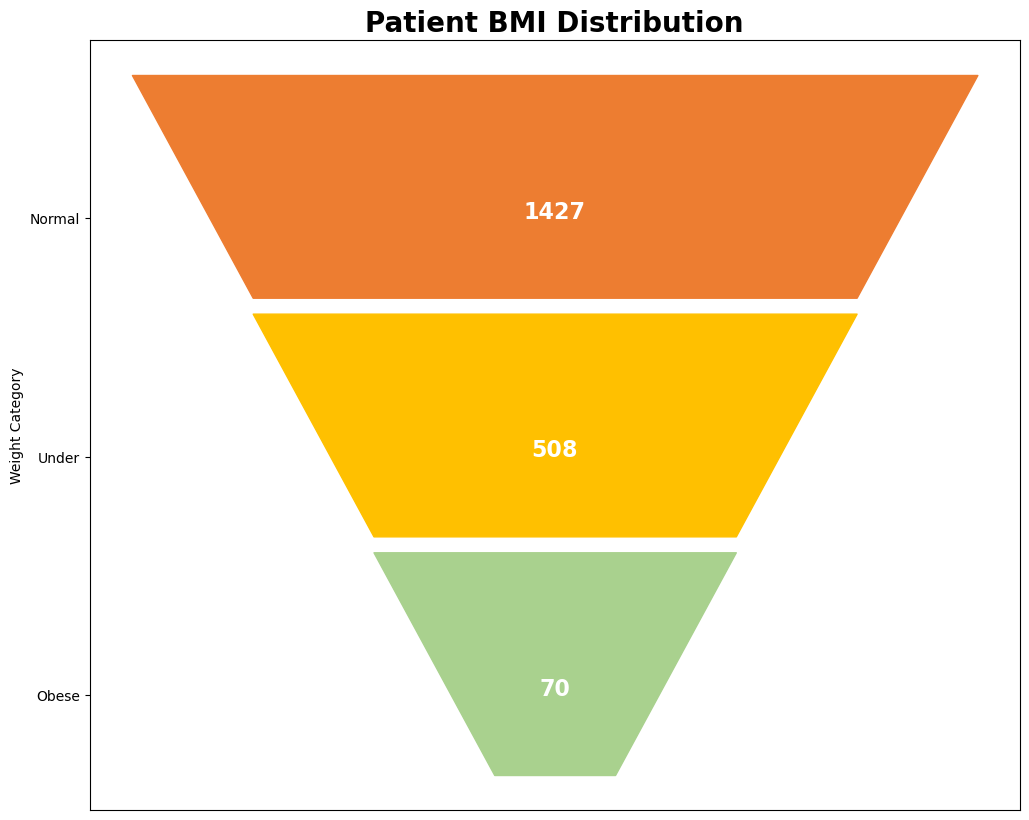

In [424]:
import pandas as pd
import matplotlib.pyplot as plt

demo =pandas.read_excel("Cardiac_Outcomes.xlsx","Demography")[["inpatient_number", "BMI"]]

Under = demo.loc[(demo["BMI"]<18.5) & (demo["BMI"]>0)].shape[0]
Obese = demo.loc[(demo["BMI"]>=30)].shape[0]
Normal = demo.loc[(demo["BMI"]>=18.5) & (demo["BMI"]<30) ].shape[0]
labels = ["Obese","Under", "Normal" ]
vals = [Obese,Under, Normal]
colors = ["#a9d18e", "#ffc000", "#ed7d31"]
df = pd.DataFrame({"Labels": labels, "Values": vals})
fig = plt.figure(figsize = (12,10))
plt.fill_betweenx(y=[1,3.8], x1 = [10,12], x2 = [8,6], color = colors[0]);
plt.fill_betweenx(y=[4,6.8], x1 = [12,14], x2 = [6,4], color = colors[1]);
plt.fill_betweenx(y=[7,9.8], x1 = [14,16], x2 = [4,2], color = colors[2]);
plt.xticks([],[]);
plt.yticks([2,5,8], df["Labels"]);
for y, value in zip([2,5,8],vals):
    plt.text(9,y, value, fontsize = 16, fontweight = "bold", color = "white", ha = "center");
plt.ylabel("Weight Category");
plt.title("Patient BMI Distribution", loc = "center", fontsize = 20, fontweight = "bold");



#Q80:Delete the column age from Q26 iteratively. 
#Q26: Create a column that randomly generates an age between the age group given for each patient. What was the average age of the patients?

In [13]:
import pandas 
import random
demo = pandas.read_excel("Cardiac_Outcomes.xlsx","Demography")
def generate_random_age(age_range): 
  lower, upper = map(int, age_range.split('-'))
  return random.randint(lower, upper)
    
demo["age"] = demo["ageCat"].apply(generate_random_age)
#demo=list(demo["age"])

for i in demo['ageCat']:
 demo['age']=''

print(demo)




      inpatient_number  gender  weight  height        BMI     occupation  \
0               857781    Male    50.0    1.64  18.590125  UrbanResident   
1               743087  Female    51.0    1.63  19.195303  UrbanResident   
2               866418    Male    70.0    1.70  24.221453         farmer   
3               775928    Male    65.0    1.70  22.491349  UrbanResident   
4               810128  Female    76.0    1.55  31.633715  UrbanResident   
...                ...     ...     ...     ...        ...            ...   
2003            740689  Female    35.0    1.50  15.555556         Others   
2004            734280  Female    50.0    1.55  20.811655  UrbanResident   
2005            781004    Male    75.0    1.70  25.951557  UrbanResident   
2006            744870    Male    40.0    1.50  17.777778  UrbanResident   
2007            791864  Female    45.0    1.55  18.730489  UrbanResident   

     ageCat age  
0     69-79      
1     69-79      
2     59-69      
3     69-79    

#Q9: Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [16]:
import numpy as np

mat1 = ([3, 4],[2 ,1])
mat2 = ([1, 5],[3, 7]) 
res = np.dot(mat1,mat2)
 
print(res)

[[15 43]
 [ 5 17]]


#Q11:A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.
{2,9587456281,1252478965,7397260044}

In [49]:
given= {2,9587456281,1252478965,7397260044}

for item in given:
  item = str(item)
  if( len(item) == 10 and (item[0] == '7' or item[0] == '8' or item[0] == '9')):
    print(item,  "\U0001f600","YES")
  else:
    print(item, "\U0001F641","NO")




9587456281 😀 YES
2 🙁 NO
7397260044 😀 YES
1252478965 🙁 NO


#Q12:If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

#Q6: What was the average age group of the patients that had an outcome of 'Alive'?

In [32]:
discharge = pandas.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")[['inpatient_number','outcome_during_hospitalization']]
demo =pandas.read_excel("Cardiac_Outcomes.xlsx","Demography")[['inpatient_number','ageCat']]
pat_alive = discharge[discharge['outcome_during_hospitalization'] == 'Alive']
merge = pandas.merge(pat_alive,demo, on = ['inpatient_number'])
grouping = merge.groupby(['ageCat'])['ageCat'].count()
print("The average age group of the patients that had an outcome of 'Alive ", grouping.idxmax())


The average age group of the patients that had an outcome of 'Alive  69-79
